# Gestione dei missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
match = pd.read_csv('output/match.csv')
tournament = pd.read_csv('output/tournament.csv')
player = pd.read_csv('output/players.csv')

match_originale = match.copy()
tournament_originale = tournament.copy()
player_originale = player.copy()

In [3]:
match.isna().sum()

match_num                  0
winner_id                  0
loser_id                   0
score                    169
best_of                    0
round                      0
minutes               104430
w_ace                 103782
w_df                  103782
w_svpt                103782
w_1stIn               103782
w_1stWon              103782
w_2ndWon              103782
w_SvGms               103778
w_bpSaved             103782
w_bpFaced             103782
l_ace                 103782
l_df                  103782
l_svpt                103782
l_1stIn               103782
l_1stWon              103782
l_2ndWon              103782
l_SvGms               103778
l_bpSaved             103782
l_bpFaced             103782
winner_rank            19372
winner_rank_points     19388
loser_rank             35232
loser_rank_points      35248
tourney_pk                 0
dtype: int64

In [4]:
match.describe()

,match_num,winner_id,loser_id,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,185764.000000,185764.000000,185764.000000,185764.000000,81334.000000,81982.000000,81982.000000,81982.000000,81982.000000,81982.000000,...,81982.000000,81982.000000,81982.000000,81986.000000,81982.000000,81982.000000,166392.000000,166376.000000,150532.000000,150516.000000
mean,160.464175,180105.888068,181613.891987,3.034162,97.695269,4.823388,2.855907,71.297004,44.270901,32.142848,...,44.565112,28.046169,12.715657,10.942612,4.658608,8.864238,383.957919,470.958107,434.321320,356.754518
std,289.562750,46571.821798,46645.664816,0.259146,41.516997,4.389558,2.420502,25.530921,16.950740,11.414119,...,16.777904,12.274711,6.322835,3.499454,3.148033,3.967422,314.201072,1041.945639,355.975553,703.270209
min,1.000000,100644.000000,100644.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,122330.000000,124079.000000,3.000000,72.000000,2.000000,1.000000,53.000000,33.000000,24.000000,...,33.000000,19.000000,8.000000,9.000000,2.000000,6.000000,137.000000,49.000000,156.000000,35.000000
50%,130.000000,203526.000000,205815.000000,3.000000,91.000000,4.000000,2.000000,67.000000,42.000000,30.000000,...,42.000000,26.000000,12.000000,10.000000,4.000000,8.000000,298.000000,161.000000,325.000000,138.000000
75%,272.000000,214152.000000,214818.000000,3.000000,119.000000,7.000000,4.000000,87.000000,54.000000,38.000000,...,54.000000,35.000000,16.000000,13.000000,6.000000,11.000000,562.000000,439.000000,642.000000,378.000000
max,8312.000000,245099.000000,245099.000000,5.000000,4756.000000,75.000000,114.000000,1957.000000,1330.000000,836.000000,...,893.000000,532.000000,399.000000,50.000000,120.000000,190.000000,2220.000000,16950.000000,2257.000000,16950.000000


## Eliminazione sottogruppo nullo

In [5]:
match = match.dropna(subset=['w_ace'])
match_originale = match_originale.dropna(subset=['w_ace']) #Aggiorno anche il riferimento ai dati originali vista la quantità

In [6]:
match.isna().sum()

match_num                0
winner_id                0
loser_id                 0
score                    0
best_of                  0
round                    0
minutes                801
w_ace                    0
w_df                     0
w_svpt                   0
w_1stIn                  0
w_1stWon                 0
w_2ndWon                 0
w_SvGms                  0
w_bpSaved                0
w_bpFaced                0
l_ace                    0
l_df                     0
l_svpt                   0
l_1stIn                  0
l_1stWon                 0
l_2ndWon                 0
l_SvGms                  0
l_bpSaved                0
l_bpFaced                0
winner_rank            899
winner_rank_points     913
loser_rank            3123
loser_rank_points     3138
tourney_pk               0
dtype: int64

## Gestione dei rank

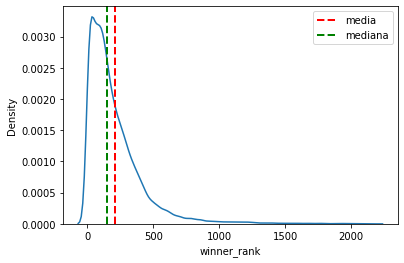

In [7]:
sns.kdeplot(data=match, x="winner_rank")
plt.axvline(np.mean(match.winner_rank), linestyle='dashed', linewidth=2, c='r', label='media')
plt.axvline(np.nanmedian(match.winner_rank), linestyle='dashed', linewidth=2, c='g', label='mediana')
plt.legend()
plt.show()

<AxesSubplot:xlabel='winner_rank_points', ylabel='Density'>

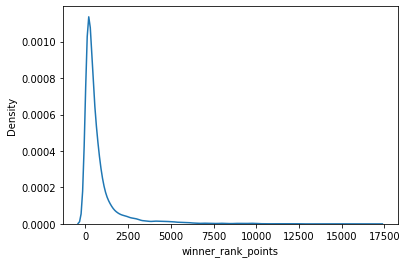

In [8]:
sns.kdeplot(data=match, x="winner_rank_points")

<AxesSubplot:xlabel='loser_rank', ylabel='Density'>

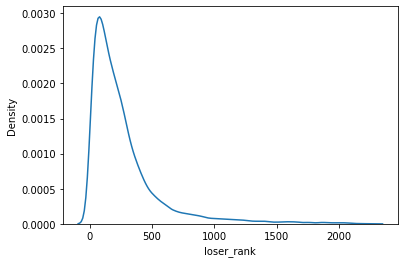

In [9]:
sns.kdeplot(data=match, x="loser_rank")

<AxesSubplot:xlabel='loser_rank_points', ylabel='Density'>

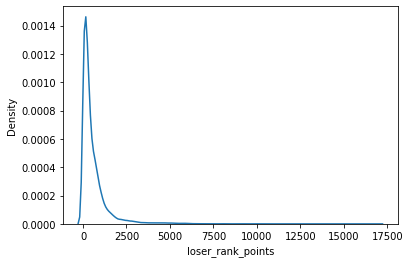

In [10]:
sns.kdeplot(data=match, x="loser_rank_points")

<AxesSubplot:xlabel='minutes', ylabel='Density'>

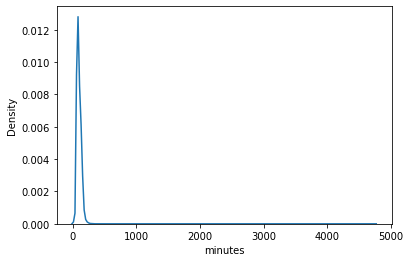

In [11]:
sns.kdeplot(data=match, x="minutes")

In [12]:
match[match.minutes > 500]['minutes'] #outliers

17217     1146.0
31074     1211.0
62894      987.0
65112     1266.0
77023     1507.0
79683     4756.0
80308     1392.0
86858     1531.0
96032      814.0
101245     510.0
117831     740.0
159808    2475.0
162629    1094.0
165792    1241.0
166278    1237.0
175092     563.0
Name: minutes, dtype: float64

<AxesSubplot:xlabel='minutes', ylabel='Density'>

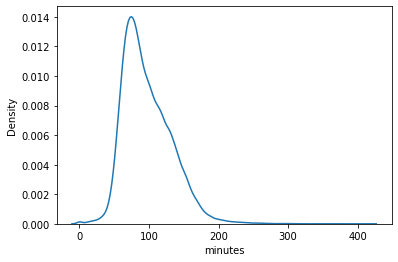

In [13]:
sns.kdeplot(data=match[match.minutes < 500], x="minutes")

In [14]:
match['winner_rank'] = match.groupby('winner_id')['winner_rank'].apply(lambda x: x.ffill().bfill())
match['winner_rank'] = match.winner_rank.fillna(int(np.nanmedian(match.winner_rank)))

match['winner_rank_points'] = match.groupby('winner_id')['winner_rank_points'].apply(lambda x: x.ffill().bfill())
match['winner_rank_points'] = match.winner_rank_points.fillna(int(np.nanmedian(match.winner_rank_points)))

match['loser_rank'] = match.groupby('loser_id')['loser_rank'].apply(lambda x: x.ffill().bfill())
match['loser_rank'] = match.loser_rank.fillna(int(np.nanmedian(match.loser_rank)))

match['loser_rank_points'] = match.groupby('loser_id')['loser_rank_points'].apply(lambda x: x.ffill().bfill())
match['loser_rank_points'] = match.loser_rank_points.fillna(int(np.nanmedian(match.loser_rank_points)))

match['minutes'] = match.groupby('tourney_pk')['minutes'].apply(lambda x: x.ffill().bfill())
match = match.dropna(subset=['minutes'])

match = match.astype({"minutes": int, "w_ace": int, "w_df": int, "w_svpt": int,
                      "w_1stIn": int, "w_1stWon": int, "w_2ndWon": int, "w_SvGms": int,
                      "w_bpSaved": int, "w_bpFaced": int, "l_ace": int, "l_df": int,
                      "l_svpt": int, "l_1stIn": int, "l_1stWon": int, "l_2ndWon": int,
                      "l_SvGms": int, "l_bpSaved": int, "l_bpFaced": int, "winner_rank": int,
                      "winner_rank_points": int, "loser_rank": int, "loser_rank_points": int})

<AxesSubplot:>

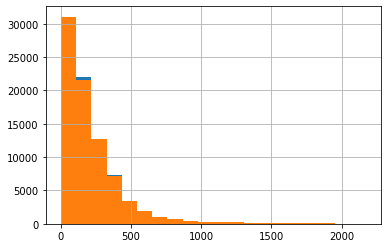

In [15]:
match['winner_rank'].hist(bins=20)
match_originale['winner_rank'].hist(bins=20)

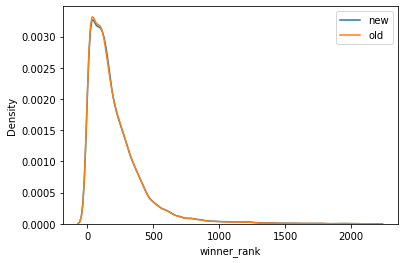

In [16]:
sns.kdeplot(data=match['winner_rank'], label='new')
sns.kdeplot(data=match_originale['winner_rank'], label='old')
plt.legend()

<AxesSubplot:>

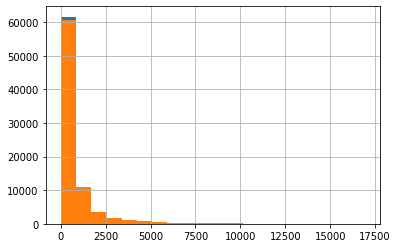

In [17]:
match['winner_rank_points'].hist(bins=20)
match_originale['winner_rank_points'].hist(bins=20)

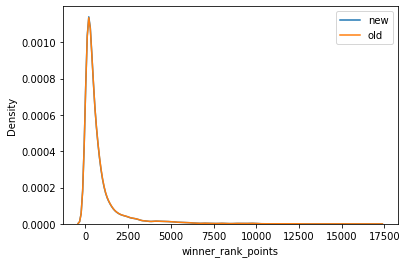

In [18]:
sns.kdeplot(data=match['winner_rank_points'], label='new')
sns.kdeplot(data=match_originale['winner_rank_points'], label='old')
plt.legend()

<AxesSubplot:>

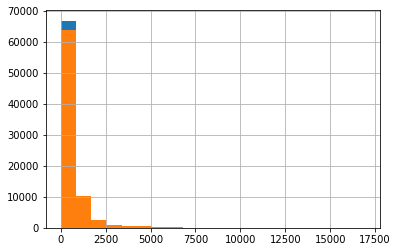

In [19]:
match['loser_rank_points'].hist(bins=20)
match_originale['loser_rank_points'].hist(bins=20)

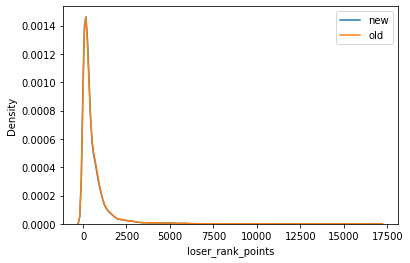

In [20]:
sns.kdeplot(data=match['loser_rank_points'], label='new')
sns.kdeplot(data=match_originale['loser_rank_points'], label='old')
plt.legend()

<AxesSubplot:>

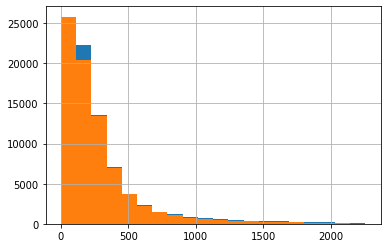

In [21]:
match['loser_rank'].hist(bins=20)
match_originale['loser_rank'].hist(bins=20)

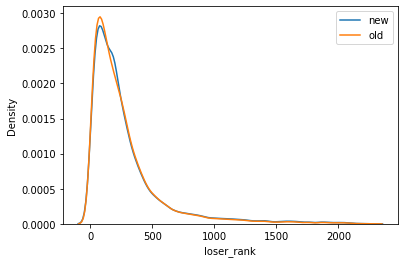

In [22]:
sns.kdeplot(data=match['loser_rank'], label='new')
sns.kdeplot(data=match_originale['loser_rank'], label='old')
plt.legend()

## Player - gestione hand, ht e year_of_birth

In [23]:
#outlier
player_originale.loc[player_originale.ht < 100, 'ht'] = None
player.loc[player.ht < 100, 'ht'] = None

<AxesSubplot:xlabel='ht', ylabel='Density'>

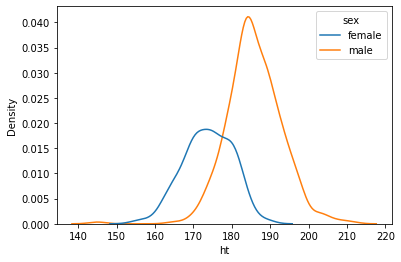

In [24]:
sns.kdeplot(data=player, x="ht", hue="sex")

In [25]:
player.loc[player.year_of_birth < 1, 'year_of_birth'] = None
player_originale.loc[player_originale.year_of_birth < 1, 'year_of_birth'] = None

player.isna().sum()

player_id           0
country_id          0
name                0
sex                 0
hand               33
ht               9552
year_of_birth    2108
dtype: int64

In [26]:
player['hand'] = player.hand.fillna('U')
player['ht'] = player.groupby(['sex'])['ht'].apply(lambda x: x.ffill().bfill())

<AxesSubplot:>

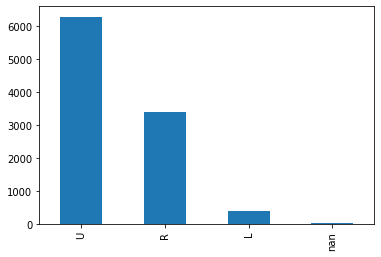

In [27]:
player['hand'].value_counts(dropna=False).plot(kind="bar")
player_originale['hand'].value_counts(dropna=False).plot(kind="bar")

<AxesSubplot:>

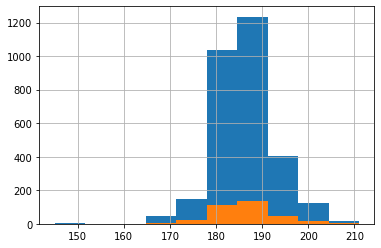

In [28]:
player['ht'][player.sex == "male"].hist()
player_originale['ht'][player.sex == "male"].hist()

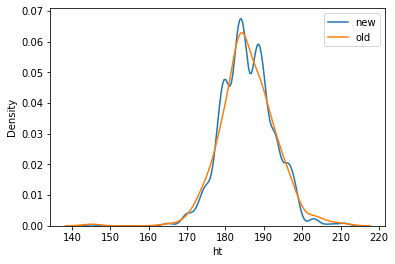

In [29]:
sns.kdeplot(data=player['ht'][player.sex == "male"], label='new')
sns.kdeplot(data=player_originale['ht'][player.sex == "male"], label='old')
plt.legend()

<AxesSubplot:>

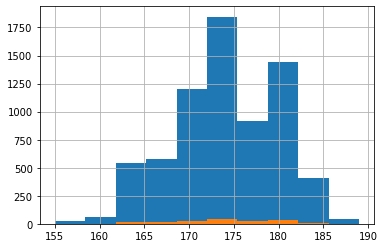

In [30]:
player['ht'][player.sex != "male"].hist()
player_originale['ht'][player.sex != "male"].hist()

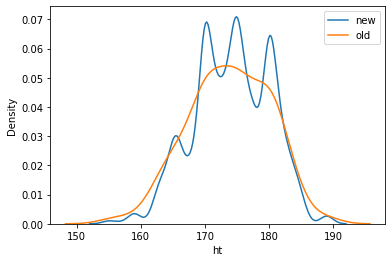

In [31]:
sns.kdeplot(data=player['ht'][player.sex != "male"], label='new')
sns.kdeplot(data=player_originale['ht'][player.sex != "male"], label='old')
plt.legend()

<AxesSubplot:>

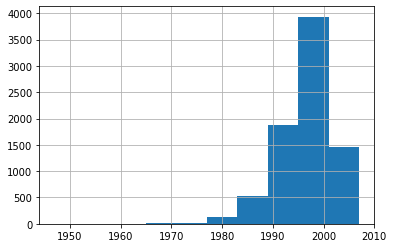

In [32]:
player['year_of_birth'].hist()

<AxesSubplot:>

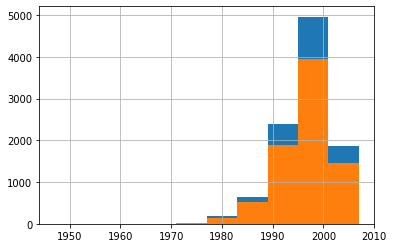

In [33]:
player['year_of_birth'] = player.year_of_birth.ffill().bfill()

player['year_of_birth'].hist()
player_originale['year_of_birth'].hist()

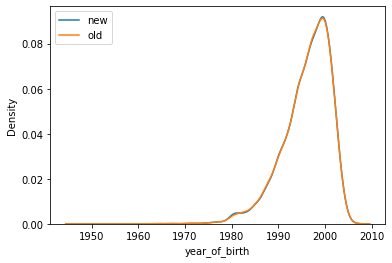

In [34]:
sns.kdeplot(data=player['year_of_birth'], label='new')
sns.kdeplot(data=player_originale['year_of_birth'], label='old')
plt.legend()

In [35]:
player = player.astype({"ht": int, "year_of_birth": int})

## Tournament - gestione surface 

In [36]:
tournament.isna().sum()

tourney_pk             0
tourney_id             0
date_id                0
tourney_name           0
surface               62
draw_size              0
tourney_level          0
tourney_spectators     0
tourney_revenue        0
dtype: int64

In [37]:
tournament['surface'] = tournament.groupby('tourney_name')['surface'].apply(lambda x: x.ffill().bfill())
tournament['surface'] = tournament.surface.fillna('Hard')

<AxesSubplot:>

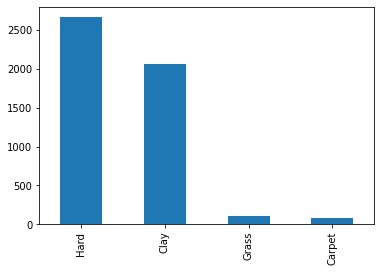

In [38]:
tournament_originale.surface.value_counts(dropna=False).plot(kind="bar")
tournament.surface.value_counts().plot(kind="bar")


In [39]:
match.to_csv('output/match_noNull.csv', index=False)
player.to_csv('output/players_noNull.csv', index=False)
tournament.to_csv('output/tournament_noNull.csv', index=False)

In [40]:
match

,match_num,winner_id,loser_id,score,best_of,round,minutes,w_ace,w_df,w_svpt,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_pk
0,247,105216,111505,6-2 6-4,3,Q1,65,0,2,44,...,17,14,9,4,8,129,429,177,285,2019-0429A201941014Stockholm
1,288,206124,201614,6-1 6-4,3,R16,69,1,1,50,...,19,3,8,2,7,136,488,50,1205,2020-2020I202030907Istanbul
3,285,105539,200366,6-2 6-3,3,R32,69,2,2,42,...,29,9,9,11,15,126,440,456,20,2019-3618C201930715Nur-Sultan CH
5,113,104731,125802,6-4 2-6 4-6 6-4 7-6(8),5,R128,234,16,3,161,...,76,27,25,4,8,122,445,149,354,2020-580G202010120Australian Open
6,270,214149,203435,6-2 6-2,3,R32,64,4,3,40,...,19,7,8,3,8,54,1075,145,403,2019-1079I201930715Bucharest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185755,252,105943,106065,6-7(3) 7-6(5) 6-4,3,Q2,152,11,7,116,...,50,30,17,4,7,179,320,188,294,2017-7161A201710206Quito
185756,247,105271,105826,6-4 7-6(8),3,Q2,98,1,0,67,...,31,24,11,5,6,370,119,715,28,2018-6724C201820409Mexico City CH
185758,252,200176,104907,0-6 6-2 6-4,3,Q3,132,6,5,92,...,25,15,12,3,7,583,50,516,65,2018-7746C201830806Jinan CH
185760,254,105487,105943,6-4 6-2,3,Q2,79,1,2,47,...,25,12,9,7,10,135,392,124,422,2020-9158A202010203Cordoba


In [41]:
match[['match_num','winner_id','tourney_pk']].drop_duplicates()

,match_num,winner_id,tourney_pk
0,247,105216,2019-0429A201941014Stockholm
1,288,206124,2020-2020I202030907Istanbul
3,285,105539,2019-3618C201930715Nur-Sultan CH
5,113,104731,2020-580G202010120Australian Open
6,270,214149,2019-1079I201930715Bucharest
...,...,...,...
185755,252,105943,2017-7161A201710206Quito
185756,247,105271,2018-6724C201820409Mexico City CH
185758,252,200176,2018-7746C201830806Jinan CH
185760,254,105487,2020-9158A202010203Cordoba
